In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("./data/expression_mRNA_17-Aug-2014.txt", "r") as f:
    lines = [line.strip().split("\t") for line in f.readlines()]

data = np.array(lines[11:]).transpose()
gene_exp_df = pd.DataFrame(
    data=data[2:, :],  # values
    columns=data[0, :],
)
gene_exp_df.head()

,Tspan12,Tshz1,Fnbp1l,Adamts15,Cldn12,Rxfp1,2310042E22Rik,Sema3c,Jam2,Apbb1ip,...,Gm20826_loc1,Gm20826_loc2,Gm20877_loc2,Gm20877_loc1,Gm20865_loc4,Gm20738_loc4,Gm20738_loc6,Gm21943_loc1,Gm21943_loc3,Gm20738_loc3
0,0,3,3,0,1,0,0,11,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,6,0,1,0,2,25,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,4,0,0,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,1,0,0,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(lines[7:10]).transpose()[1:, :]
labels_df = pd.DataFrame(data=data[1:, :], columns=data[0, :])

In [4]:
num_features = 558

gene_exp_df = gene_exp_df.astype(float)
genes_chosen = list(
    gene_exp_df.std(axis=0).sort_values(ascending=False)[:num_features].index
)
genes_chosen_df = gene_exp_df[genes_chosen]
genes_chosen_df

,Malat1,Plp1,Ttr,Sst,Hbb-bs,Npy,Meg3,Calm1,Trf,Hba-a2_loc2,...,Tagln,Caly,H3f3a,Tubb4b,Nap1l1,Plk2,Nrsn1,Map4,Sorl1,Eif4g2
0,822.0,0.0,0.0,0.0,0.0,172.0,18.0,121.0,0.0,0.0,...,0.0,7.0,6.0,0.0,10.0,1.0,9.0,7.0,10.0,6.0
1,869.0,0.0,0.0,0.0,0.0,0.0,28.0,68.0,0.0,0.0,...,0.0,2.0,1.0,2.0,3.0,3.0,0.0,9.0,0.0,11.0
2,1237.0,1.0,0.0,0.0,0.0,120.0,146.0,117.0,0.0,0.0,...,0.0,9.0,10.0,5.0,19.0,2.0,29.0,10.0,5.0,18.0
3,1252.0,0.0,0.0,0.0,0.0,0.0,47.0,113.0,0.0,0.0,...,0.0,10.0,0.0,11.0,22.0,1.0,2.0,16.0,2.0,28.0
4,271.0,1.0,0.0,0.0,0.0,0.0,5.0,86.0,0.0,0.0,...,0.0,7.0,2.0,7.0,6.0,1.0,15.0,6.0,11.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,206.0,0.0,0.0,0.0,0.0,0.0,10.0,14.0,0.0,0.0,...,1.0,0.0,3.0,0.0,1.0,2.0,0.0,1.0,0.0,3.0
3001,96.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,...,13.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3002,376.0,0.0,0.0,1.0,0.0,0.0,107.0,24.0,0.0,0.0,...,9.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3003,303.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,...,10.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
full_df = pd.merge(labels_df, genes_chosen_df, left_index=True, right_index=True)
full_df

,cell_id,level1class,level2class,Malat1,Plp1,Ttr,Sst,Hbb-bs,Npy,Meg3,...,Tagln,Caly,H3f3a,Tubb4b,Nap1l1,Plk2,Nrsn1,Map4,Sorl1,Eif4g2
0,1772071015_C02,interneurons,Int10,822.0,0.0,0.0,0.0,0.0,172.0,18.0,...,0.0,7.0,6.0,0.0,10.0,1.0,9.0,7.0,10.0,6.0
1,1772071017_G12,interneurons,Int10,869.0,0.0,0.0,0.0,0.0,0.0,28.0,...,0.0,2.0,1.0,2.0,3.0,3.0,0.0,9.0,0.0,11.0
2,1772071017_A05,interneurons,Int6,1237.0,1.0,0.0,0.0,0.0,120.0,146.0,...,0.0,9.0,10.0,5.0,19.0,2.0,29.0,10.0,5.0,18.0
3,1772071014_B06,interneurons,Int10,1252.0,0.0,0.0,0.0,0.0,0.0,47.0,...,0.0,10.0,0.0,11.0,22.0,1.0,2.0,16.0,2.0,28.0
4,1772067065_H06,interneurons,Int9,271.0,1.0,0.0,0.0,0.0,0.0,5.0,...,0.0,7.0,2.0,7.0,6.0,1.0,15.0,6.0,11.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,1772067059_B04,endothelial-mural,Peric,206.0,0.0,0.0,0.0,0.0,0.0,10.0,...,1.0,0.0,3.0,0.0,1.0,2.0,0.0,1.0,0.0,3.0
3001,1772066097_D04,endothelial-mural,Vsmc,96.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3002,1772063068_D01,endothelial-mural,Vsmc,376.0,0.0,0.0,1.0,0.0,0.0,107.0,...,9.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3003,1772066098_A12,endothelial-mural,Vsmc,303.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
import umap
import matplotlib.pyplot as plt

cell_classes = list(set(labels_df.level1class))
cell_classes_map = {}
for idx, cell in enumerate(cell_classes):
    cell_classes_map[cell] = idx

c = [cell_classes_map[cell] for cell in labels_df.level1class]

reducer = umap.UMAP()
embedding = reducer.fit_transform(genes_chosen_df)

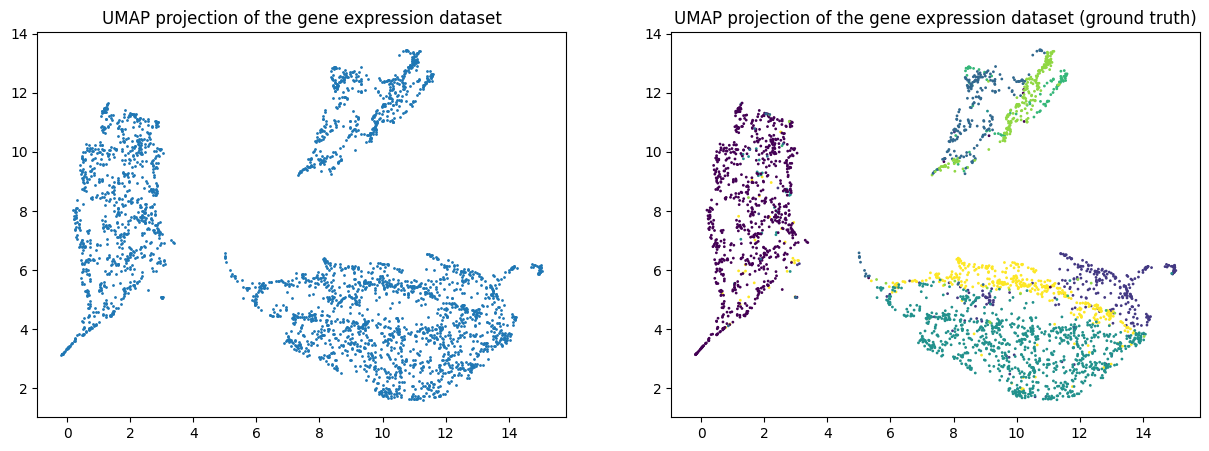

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(embedding[:, 0], embedding[:, 1], s=1)
ax[0].set_title("UMAP projection of the gene expression dataset", fontsize=12)
ax[1].scatter(embedding[:, 0], embedding[:, 1], s=1, c=c)
ax[1].set_title(
    "UMAP projection of the gene expression dataset (ground truth)", fontsize=12
)
plt.show()
fig.savefig("umap.svg")

In [7]:
genes_chosen_df

,Malat1,Plp1,Ttr,Sst,Hbb-bs,Npy,Meg3,Calm1,Trf,Hba-a2_loc2,...,Tagln,Caly,H3f3a,Tubb4b,Nap1l1,Plk2,Nrsn1,Map4,Sorl1,Eif4g2
0,822.0,0.0,0.0,0.0,0.0,172.0,18.0,121.0,0.0,0.0,...,0.0,7.0,6.0,0.0,10.0,1.0,9.0,7.0,10.0,6.0
1,869.0,0.0,0.0,0.0,0.0,0.0,28.0,68.0,0.0,0.0,...,0.0,2.0,1.0,2.0,3.0,3.0,0.0,9.0,0.0,11.0
2,1237.0,1.0,0.0,0.0,0.0,120.0,146.0,117.0,0.0,0.0,...,0.0,9.0,10.0,5.0,19.0,2.0,29.0,10.0,5.0,18.0
3,1252.0,0.0,0.0,0.0,0.0,0.0,47.0,113.0,0.0,0.0,...,0.0,10.0,0.0,11.0,22.0,1.0,2.0,16.0,2.0,28.0
4,271.0,1.0,0.0,0.0,0.0,0.0,5.0,86.0,0.0,0.0,...,0.0,7.0,2.0,7.0,6.0,1.0,15.0,6.0,11.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,206.0,0.0,0.0,0.0,0.0,0.0,10.0,14.0,0.0,0.0,...,1.0,0.0,3.0,0.0,1.0,2.0,0.0,1.0,0.0,3.0
3001,96.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,...,13.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3002,376.0,0.0,0.0,1.0,0.0,0.0,107.0,24.0,0.0,0.0,...,9.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3003,303.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,...,10.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
